In [1]:
%load_ext autoreload
%autoreload 2

from transform_datasets.patterns.synthetic import *
from transform_datasets.dataset import TransformDataset
from transform_datasets.transforms import *
import matplotlib.pyplot as plt
import svis
%matplotlib inline

### Harmonic S1

In [273]:
pattern = HarmonicsS1(dim=256, n_classes=10)

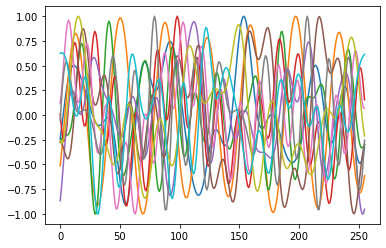

In [274]:
plt.plot(pattern.data.T);

In [275]:
np.arange(0, 100, 10)

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

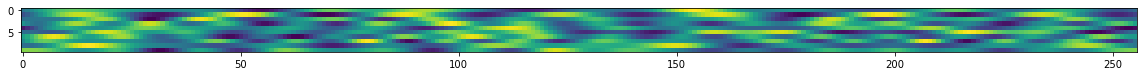

In [276]:
plt.figure(figsize=(20, 20))
plt.imshow(pattern.data)

In [305]:
translate = CyclicTranslation1D(fraction_transforms=0.1, sample_method='linspace')
noise = UniformNoise(n_samples=1, magnitude=0.5)

In [306]:
noise

In [309]:
dataset = TransformDataset(pattern, [translate, translate])

In [313]:
dataset.transform_labels['cyclic-translation-1d']

tensor([  0,  10,  21,  ..., 233, 244, 255])

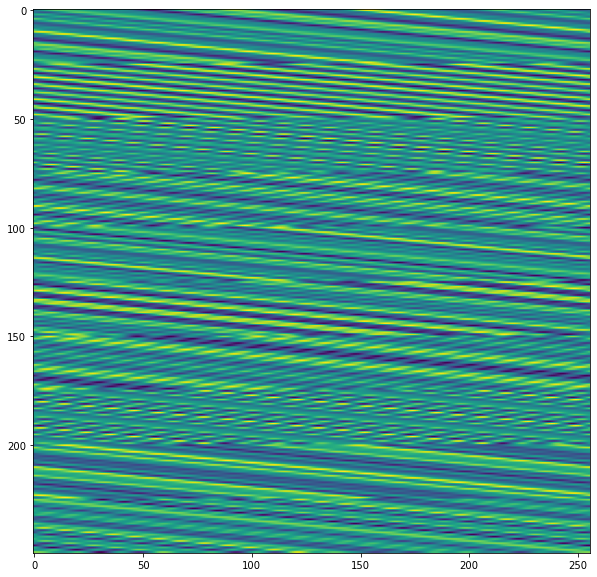

In [114]:
plt.figure(figsize=(20, 10))
plt.imshow(dataset.data[:512])

### Harmonic S1 x S1

In [115]:
pattern = HarmonicsS1xS1(img_size=(16, 16), n_classes=1)

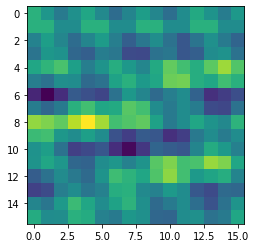

In [116]:
plt.imshow(pattern.data[0])

In [229]:
translate = CyclicTranslation2D(fraction_transforms=0.5, sample_method='random')

In [ ]:
dataset = TransformDataset(pattern, [translate])

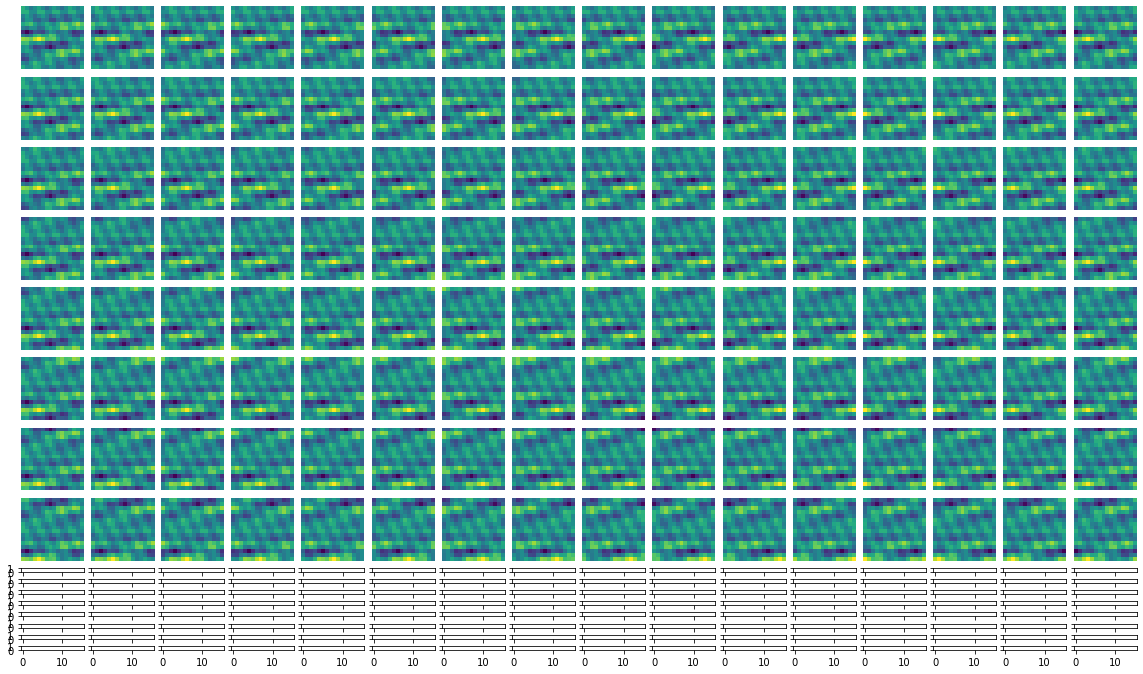

In [130]:
svis.image_grid(dataset.data, shape=(16, 16), figsize=(20, 20))

In [259]:
pattern = HarmonicsS1xS1(img_size=(16, 16), n_classes=10)

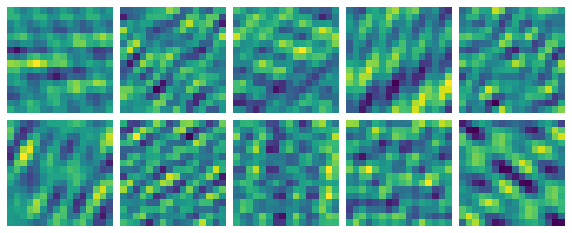

In [260]:
svis.image_grid(pattern.data, shape=(2, 5))

In [268]:
translate = CyclicTranslation2D(fraction_transforms=0.05)

In [269]:
dataset = TransformDataset(pattern, [translate])

KeyError: 0

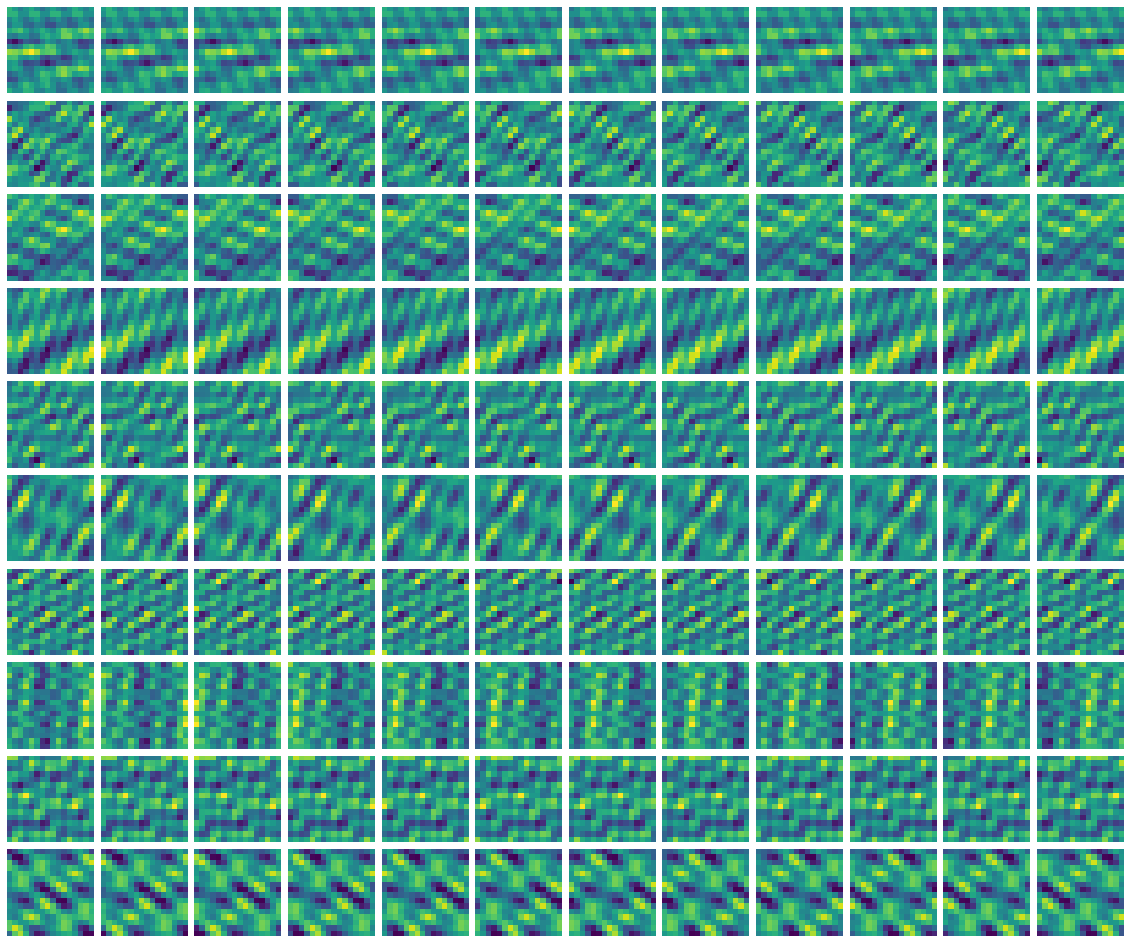

In [342]:
svis.image_grid(dataset.data, shape=(10, 12), figsize=(20, 20))

In [326]:
pattern = HarmonicsS1xS1(img_size=(16, 16), n_classes=10)
translate = CyclicTranslation2D(fraction_transforms=0.05)
rotate = SO2(fraction_transforms=0.03, sample_method='linspace')
crop = CircleCrop()
dataset = TransformDataset(pattern, [translate, rotate])

In [330]:
dataset.transform_labels['so2']

tensor([  0.0000,  39.8889,  79.7778,  ..., 279.2222, 319.1111, 359.0000],
       dtype=torch.float64)

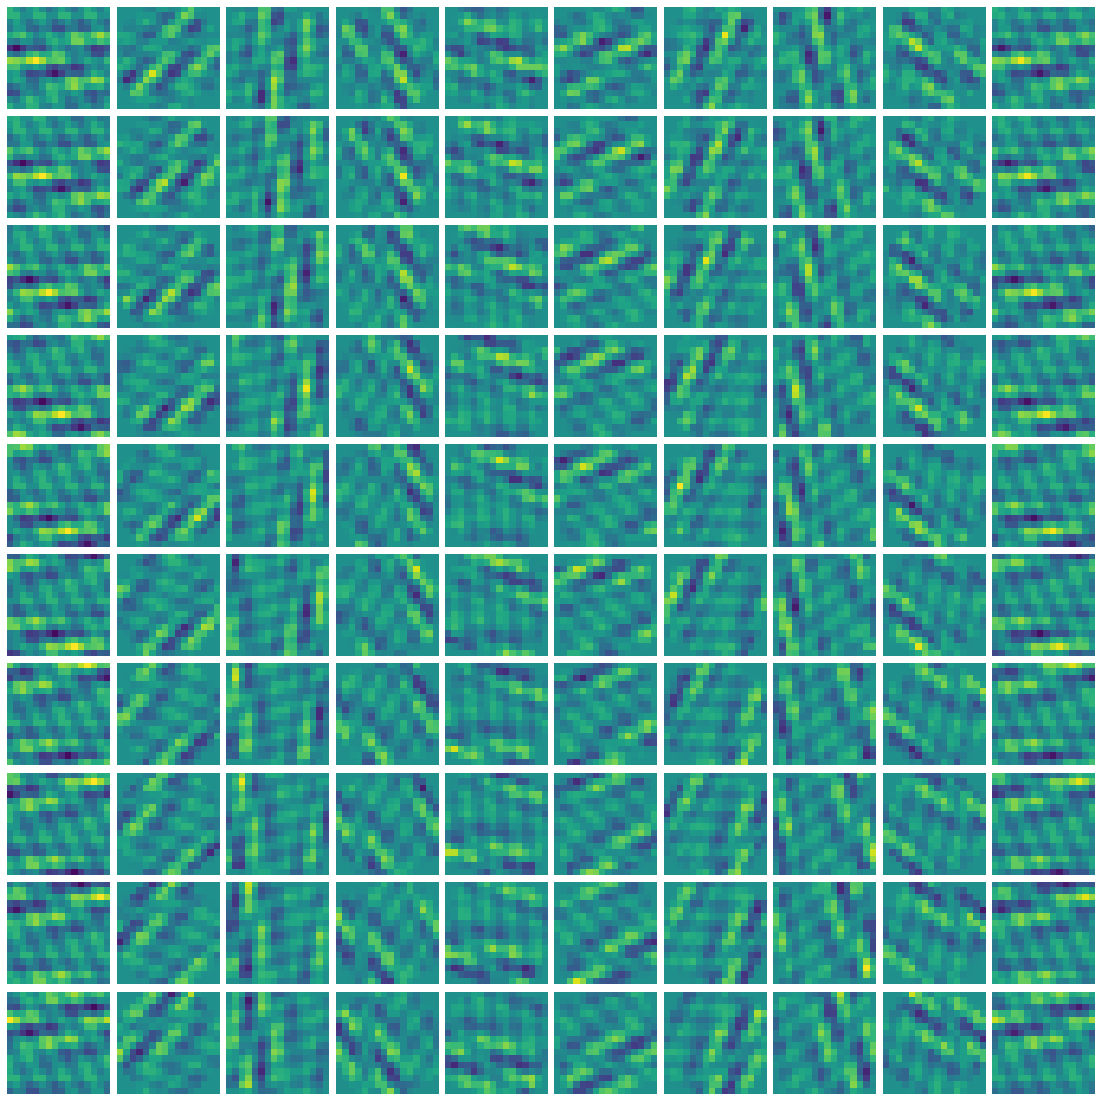

In [323]:
svis.image_grid(dataset.data, shape=(10, 10), figsize=(20, 20))

In [16]:
pattern = HarmonicsS1xS1(img_size=(16, 16), n_classes=1)
rotate = SO2(fraction_transforms=0.03)
crop = CircleCrop()
scale = Scaling(sample_method='linspace')
blur = GaussianBlur()
translate = CyclicTranslation2D(fraction_transforms=0.05)
dataset = TransformDataset(pattern, [translate, blur, rotate, crop, scale])

In [17]:
dataset.transform_labels

OrderedDict([('cyclic-translation-2d',
              tensor([[ 0,  0],
                      [ 0,  0],
                      [ 0,  0],
                      ...,
                      [15, 15],
                      [15, 15],
                      [15, 15]])),
             ('gaussian-blur',
              tensor([0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.5000])),
             ('so2',
              tensor([  0.,   0.,   0.,  ..., 359., 359., 359.], dtype=torch.float64)),
             ('circle-crop', tensor([0., 0., 0.,  ..., 0., 0., 0.])),
             ('scaling',
              tensor([0.5000, 0.5556, 0.6111,  ..., 0.8889, 0.9444, 1.0000],
                     dtype=torch.float64))])

In [18]:
[len(v) for x, v in dataset.transform_labels.items()]

[1200, 1200, 1200, 1200, 1200]

In [5]:
len(dataset.transform_labels['so2'])

100

In [244]:
len(dataset.transform_labels['so2'])

10

In [250]:
len(dataset.transform_labels['circle-crop'])

10

In [248]:
len(dataset.transform_labels['scaling'])

100

In [227]:
dataset.data.shape

torch.Size([100, 64, 64])

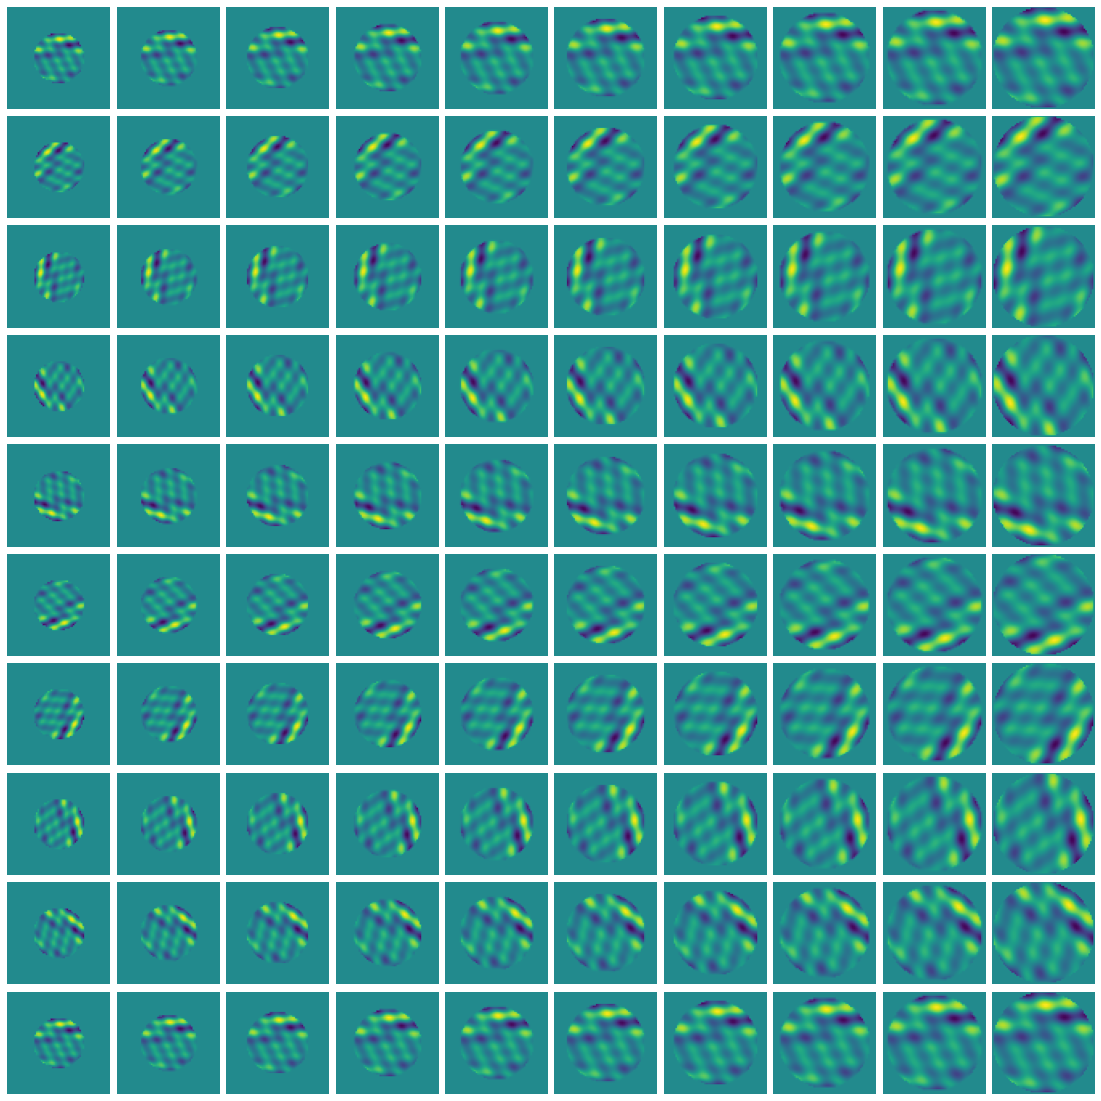

In [228]:
svis.image_grid(dataset.data, shape=(10, 10), figsize=(20, 20))

In [302]:
from skimage import transform

In [303]:
import skimage

In [305]:
skimage.transform.rotate

<function skimage.transform._warps.rotate(image, angle, resize=False, center=None, order=None, mode='constant', cval=0, clip=True, preserve_range=False)>

In [17]:
pattern = HarmonicsS1xS1(img_size=(64, 64), n_classes=1)
noise = UniformNoise(n_samples=1, magnitude=0.5)
dataset = TransformDataset(pattern, [noise])

[autoreload of transform_datasets.transforms failed: Traceback (most recent call last):
  File "/Users/sophia/opt/anaconda3/envs/py3/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/Users/sophia/opt/anaconda3/envs/py3/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 410, in superreload
    update_generic(old_obj, new_obj)
  File "/Users/sophia/opt/anaconda3/envs/py3/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 347, in update_generic
    update(a, b)
  File "/Users/sophia/opt/anaconda3/envs/py3/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 302, in update_class
    if update_generic(old_obj, new_obj): continue
  File "/Users/sophia/opt/anaconda3/envs/py3/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 347, in update_generic
    update(a, b)
  File "/Users/sophia/opt/anaconda3/envs/py3/lib/python3.8/site-packages/IPython

In [15]:
dataset.data.shape

torch.Size([1, 64, 64])

In [13]:
dataset.transform_labels

OrderedDict([('random-uniform', tensor([0.5000]))])

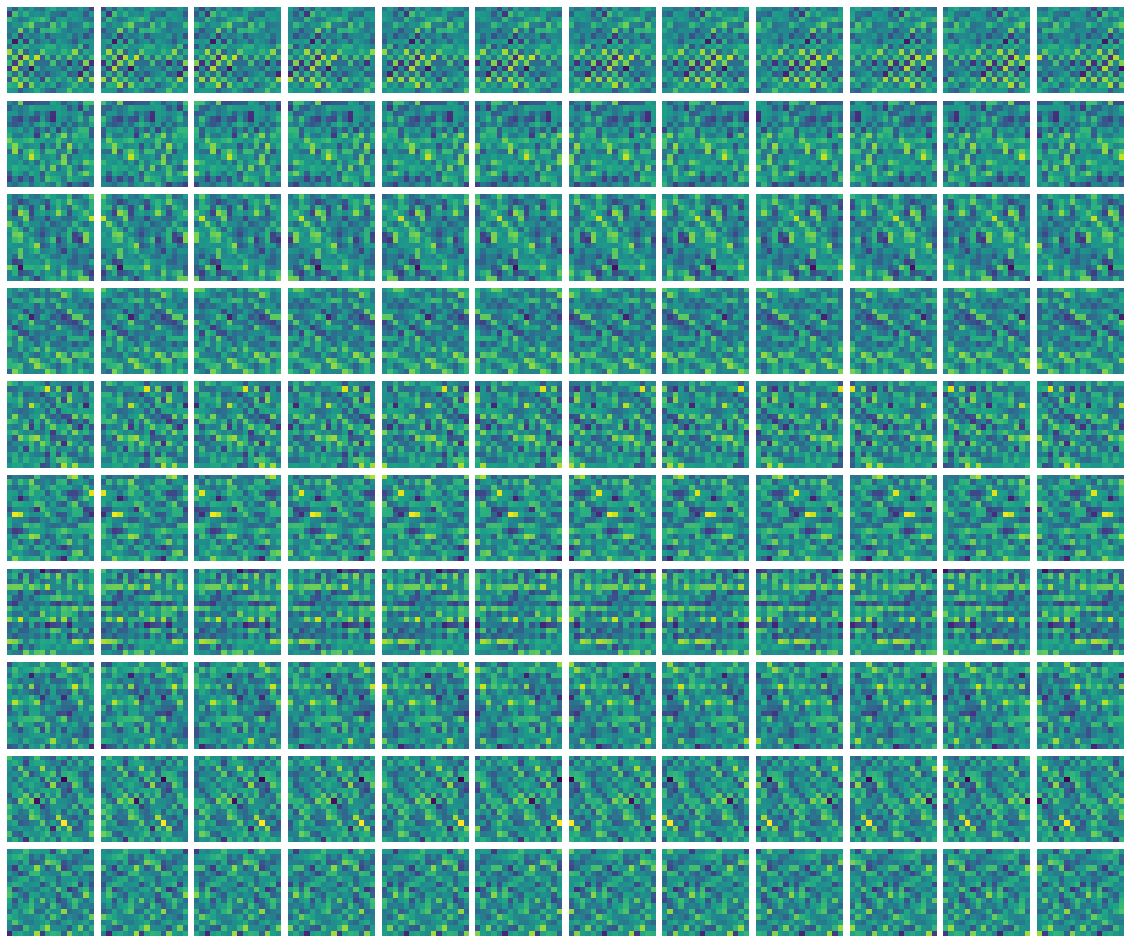

In [235]:
svis.image_grid(dataset.data, shape=(10, 12), figsize=(20, 20))

### HarmonicsS2

In [152]:
pattern = HarmonicsS2(n_classes=1)

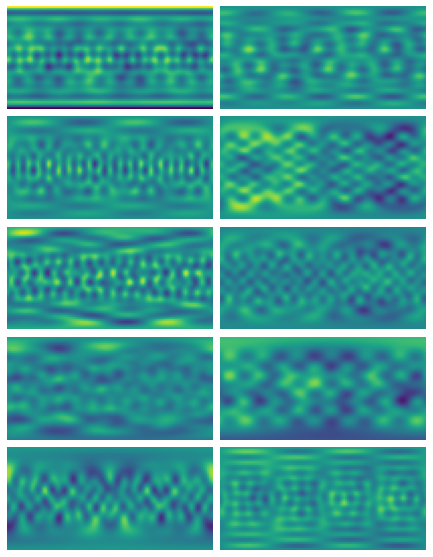

In [139]:
svis.image_grid(pattern.data, shape=(5, 2))

In [173]:
rotate = SO3(n_samples=125, sample_method='random', seed=1)

In [174]:
dataset = TransformDataset(pattern, [rotate])

In [175]:
dataset.data.shape

torch.Size([125, 51, 102])

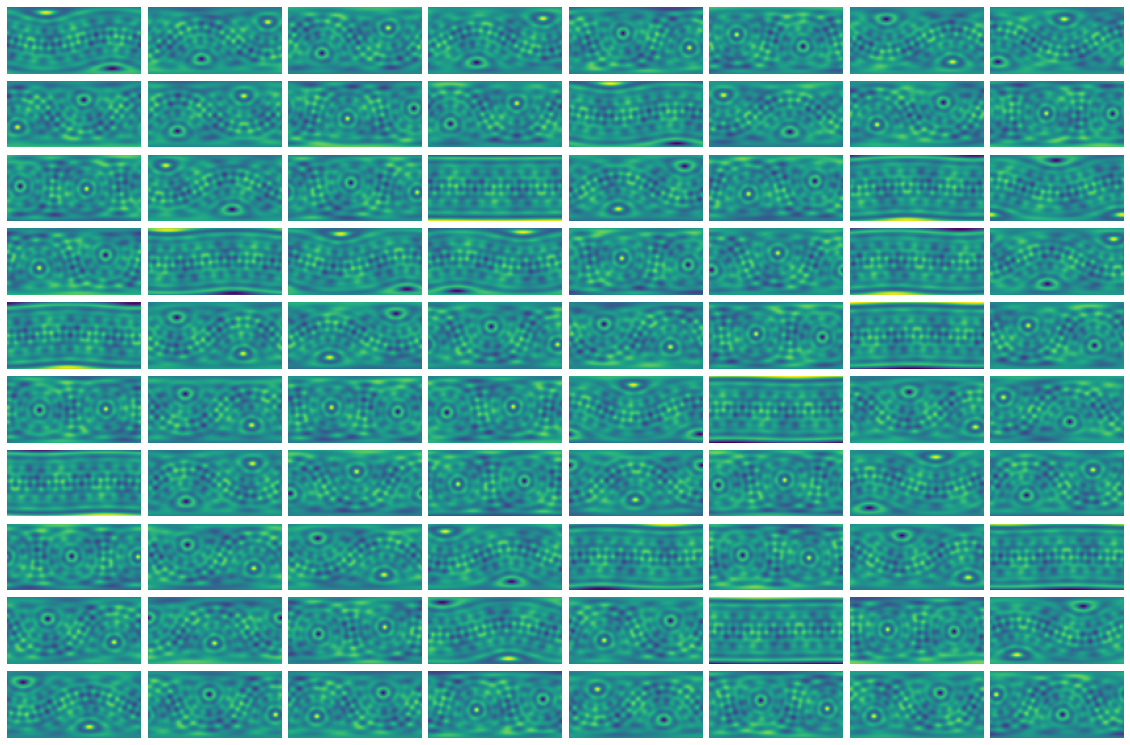

In [176]:
svis.image_grid(dataset.data, shape=(10, 8), figsize=(20, 20))

### Random Uniform

In [2]:
pattern = RandomUniform()
translate = CyclicTranslation1D(1.0)
dataset = TransformDataset(pattern, translate)

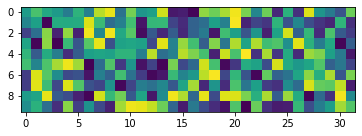

In [5]:
plt.imshow(pattern.data)

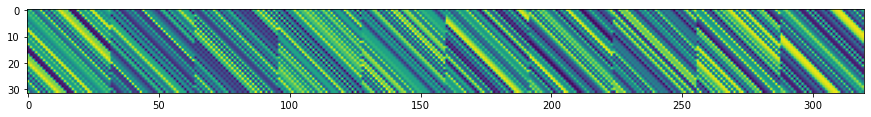

In [16]:
plt.figure(figsize=(15, 10))
plt.imshow(dataset.data.T)

In [17]:
pattern = RandomUniform(size=(16, 16))
translate = CyclicTranslation2D(0.05)
dataset = TransformDataset(pattern, translate)

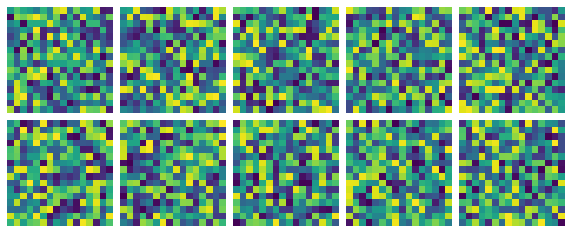

In [20]:
svis.image_grid(pattern.data, shape=(2, 5))

In [30]:
dataset.data.shape

torch.Size([120, 16, 16])

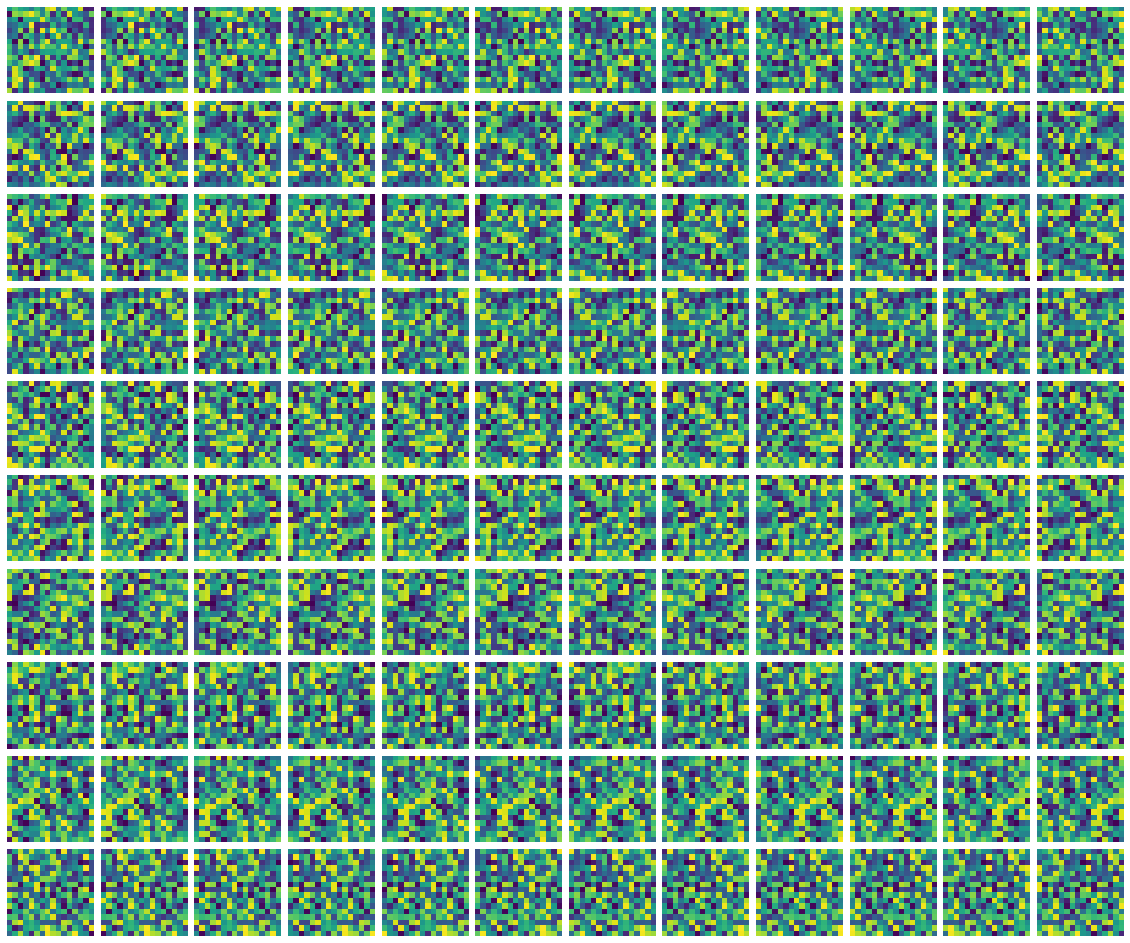

In [32]:
svis.image_grid(dataset.data, shape=(10, 12), figsize=(20, 20))

In [49]:
pattern = RandomUniform(size=(16, 16))
blur = GaussianBlur(1.0)
dataset = TransformDataset(pattern, blur)

In [50]:
blur

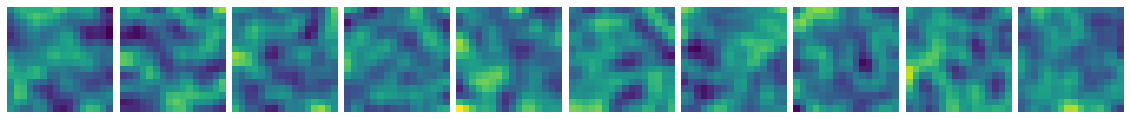

In [51]:
svis.image_grid(dataset.data, shape=(1, 10), figsize=(20, 20))

In [58]:
pattern = RandomUniform(size=(16, 16))
c4 = C4()
dataset = TransformDataset(pattern, [c4, blur])

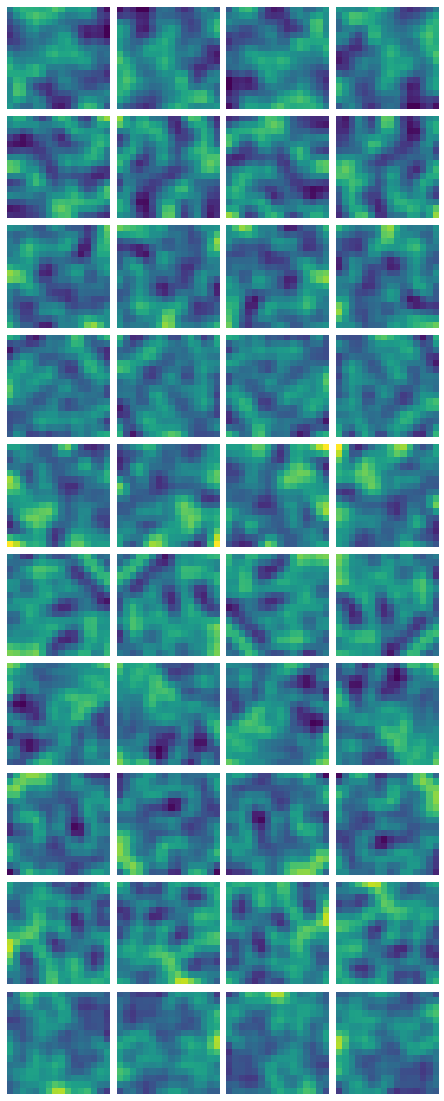

In [59]:
svis.image_grid(dataset.data, shape=(10, 4), figsize=(20, 20))

### Random Normal

In [33]:
pattern = RandomNormal()
translate = CyclicTranslation1D(1.0)
dataset = TransformDataset(pattern, translate)

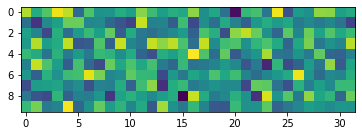

In [35]:
plt.imshow(pattern.data)

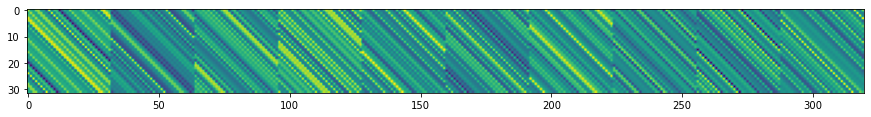

In [34]:
plt.figure(figsize=(15, 10))
plt.imshow(dataset.data.T)

In [38]:
pattern = RandomNormal(size=(16, 16))
translate = CyclicTranslation2D(0.05)
dataset = TransformDataset(pattern, translate)

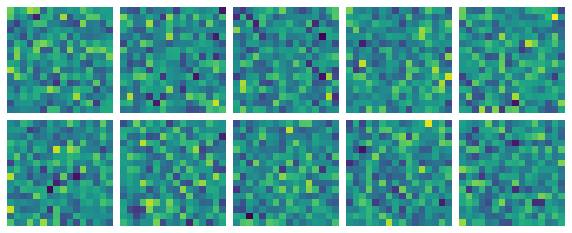

In [39]:
svis.image_grid(pattern.data, shape=(2, 5))

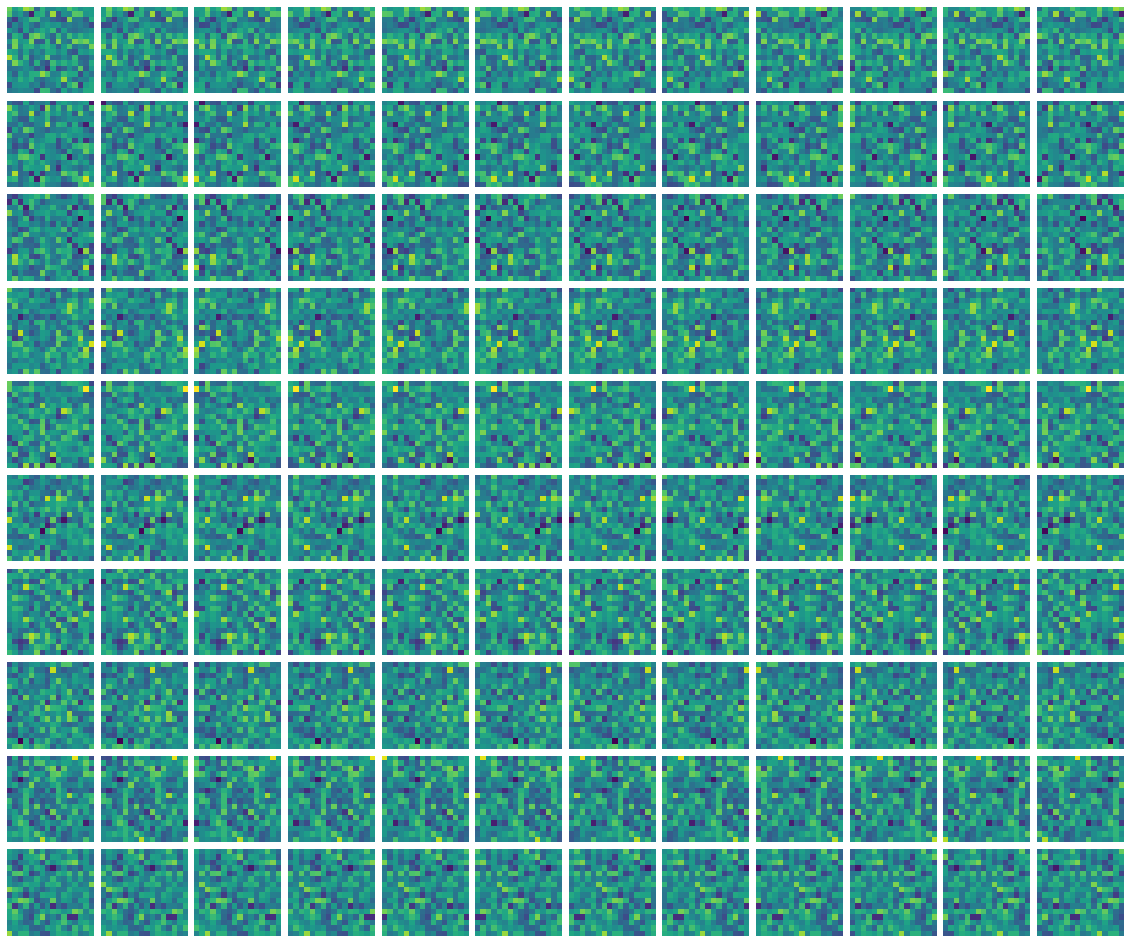

In [40]:
svis.image_grid(dataset.data, shape=(10, 12), figsize=(20, 20))